In [6]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import sys
import os.path
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.style.use('v2.0')
plt.style.use('ggplot')

import numpy as np
import pandas as pd


sys.path.append(os.path.dirname("../"))

from plugins.FaxDistiller import Distill

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
raw_file = "../data/FakeWaveform_raw/XENON1T-0-000000000-000000999-000001000.zip"
truth_file = "../data/FakeWaveform_truth.csv"
instructions_file = "../data/FakeWaveform.csv"

### Load FAX raw data and distill down into useful parts

In [10]:
distiller = Distill(raw_file, truth_file, instructions_file)
distiller.load()

100%|██████████| 1000/1000 [00:01<00:00, 533.36it/s]


### The way to retrieve distilled data

In [11]:
### Distill.get() returns iterator of distilled data for the event (objects of the Condensate() class)
event = distiller.get(1).__next__()
event.get_event().head()

,baseline,channel,event_number,left,length,max_waveform_length,right,waveform
0,NaN,0,0,82764,158,158,82921,"[16002, 16006, 15998, 16006, 16000, 16003, 159..."
1,NaN,2,0,82646,284,284,82929,"[15999, 16001, 16003, 16003, 16004, 16005, 160..."
2,NaN,3,0,82738,130,130,82867,"[16001, 15999, 16002, 15999, 16001, 16000, 160..."
3,NaN,4,0,82698,198,198,82895,"[16006, 16002, 16008, 16003, 16008, 16004, 160..."
4,NaN,5,0,72794,100,100,72893,"[16002, 16002, 16005, 16007, 16004, 16006, 160..."


In [12]:
print(event.__doc__)


        Class of distilled FAX events.
        
        Methods:
            : get_events() : Returns pandas.DataFrame with core information on pulses in the event.
            : get_waveforms_in_channel() : Returns pandas.DataFrame with reconstructed waveforms per
                                           channel (pmt) for the event.
            : get_event_truth() : Returns pandas.DataFrame with FAX truth information on the event
    


### Loop over events and store distilled data for each event

In [15]:
events = []
waveforms_in_channels = []
event_truths = []

n_events = 10

for distilled_events in distiller.get(n_events):
    
    events.append(distilled_events.get_event())  # Retrieve pandas.DataFrame of event information
    waveforms_in_channels.append(distilled_events.get_waveforms_in_channels())  # Retrieve pandas.DataFrame 
                                                                                # of per channel reconstructed 
                                                                                # waveforms in the event
    event_truths.append(distilled_events.get_event_truth())  # Retrieve pandas.DataFrame of PAX truth information for event

In [16]:
# Concat all dataframes
events_concat = pd.concat(events)
waveforms_in_channels_concat = pd.concat(waveforms_in_channels)
event_truths_concat = pd.concat(event_truths)

waveforms_in_channels_concat.head()

,channel_0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,channel_9,...,channel_239,channel_240,channel_241,channel_242,channel_243,channel_244,channel_245,channel_246,channel_247,event_number
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


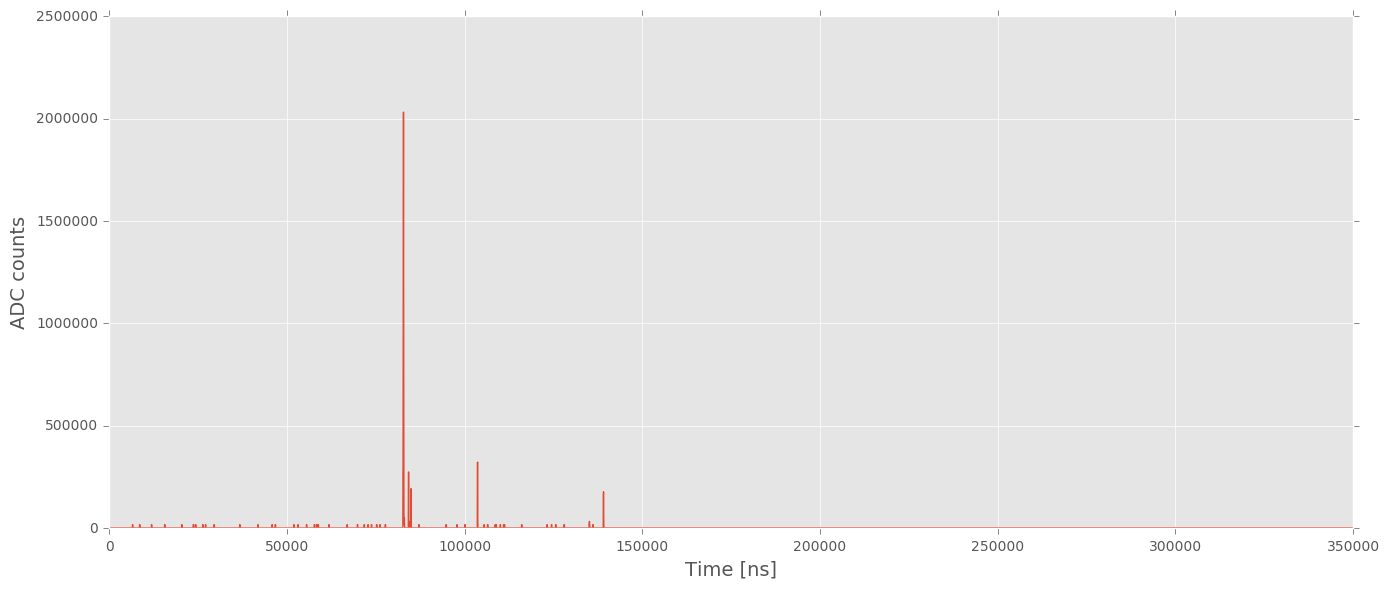

In [17]:
### Plot of waveforms for each pmt summed up

sum_waveforms = waveforms_in_channels[0].drop("event_number", axis=1).sum(axis=1)

fig = plt.figure(figsize=(14,6))
ax = plt.subplot(111)
p1 = ax.plot(sum_waveforms.index, sum_waveforms)
ax.set_xlabel("Time [ns]", size=14)
ax.set_ylabel("ADC counts", size=14)
plt.tight_layout()
# fig.savefig("recon_waveform_example.png", dpi=240)